## Q1

In [5]:
import pandas as pd
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

ds=pd.read_csv('audio_labels_20250802_145147.csv')

def ex_mfcc(path):
    try:
        y,sr=librosa.load(path,sr=None)
        mfcc=librosa.feature.mfcc(y=y,sr=sr,n_mfcc=13)
        return np.mean(mfcc,axis=1)
    except Exception as e:
        print(f"something wrong with this guy {path} or this guy {e}")
        return None
ds['features']=ds['file_path'].apply(ex_mfcc)

# initializing x and y
x=np.vstack(ds['features'].values)
y=ds['label'].map({'clear':1,'unclear':0})
# using train_text_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
# KNN
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
# prediction
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_train,y_train_pred))



[[ 7  5]
 [ 1 10]]
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.67      0.91      0.77        11

    accuracy                           0.74        23
   macro avg       0.77      0.75      0.73        23
weighted avg       0.78      0.74      0.73        23

[[30 10]
 [ 8 41]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        40
           1       0.80      0.84      0.82        49

    accuracy                           0.80        89
   macro avg       0.80      0.79      0.79        89
weighted avg       0.80      0.80      0.80        89



## Q2)

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score


df=pd.read_excel("Lab Session Data.xlsx", sheet_name="IRCTC Stock Price")

df['Day_num']=df['Day'].astype('category').cat.codes
df['Month_num']=df['Month'].astype('category').cat.codes
X=df[['Day_num','Month_num']]
y=df['Price']

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)
model=KNeighborsRegressor(n_neighbors=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mape=mean_absolute_percentage_error(y_test, y_pred)* 100
r2=r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.2f}")



MSE: 7491.98
RMSE: 86.56
MAPE: 3.83%
R² Score: 0.89


## Q3)

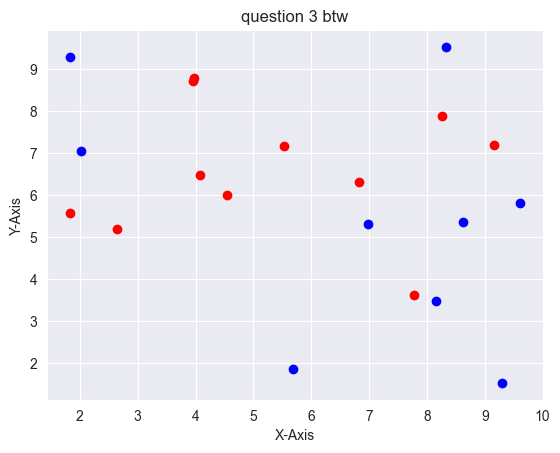

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x=np.random.uniform(1,10,size=(20,2))
y=np.random.choice([0,1],size=20)

for i in range(20):
    colour='blue' if y[i]==0 else 'red'
    plt.scatter(x[i,0],x[i,1],color=colour)

plt.title("question 3 btw")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.show()

## Q4)

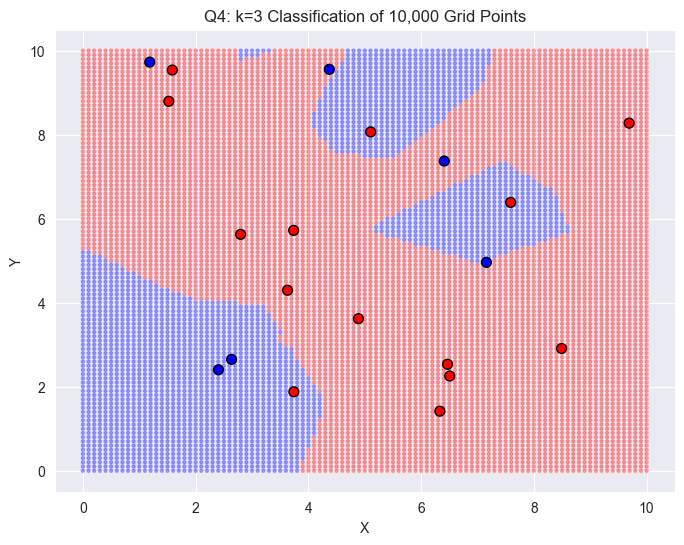

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)
X_train=np.random.uniform(1,10,size=(20,2))
y_train=np.random.choice([0,1],size=20)
x_vals=np.arange(0,10.1,0.1)
y_vals=np.arange(0,10.1,0.1)
xx,yy=np.meshgrid(x_vals,y_vals)
X_test=np.c_[xx.ravel(),yy.ravel()]

model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred,cmap='bwr',alpha=0.3,s=5)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='bwr',edgecolor='black',s=50)
plt.title("Q4: k=3 Classification of 10,000 Grid Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


## Q5)

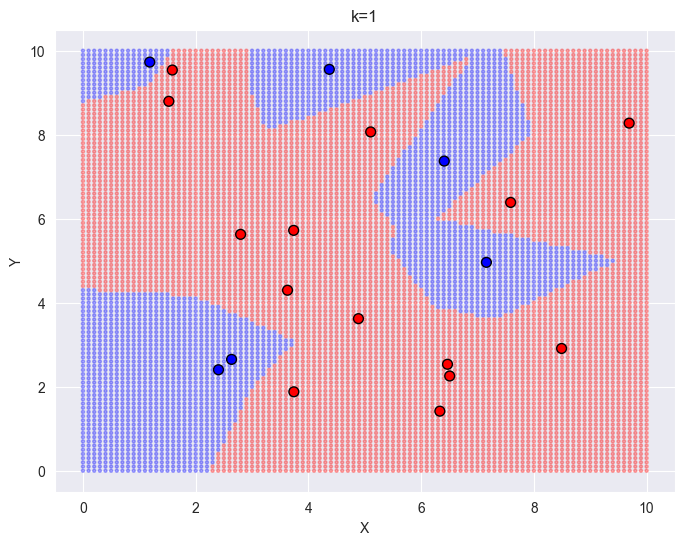

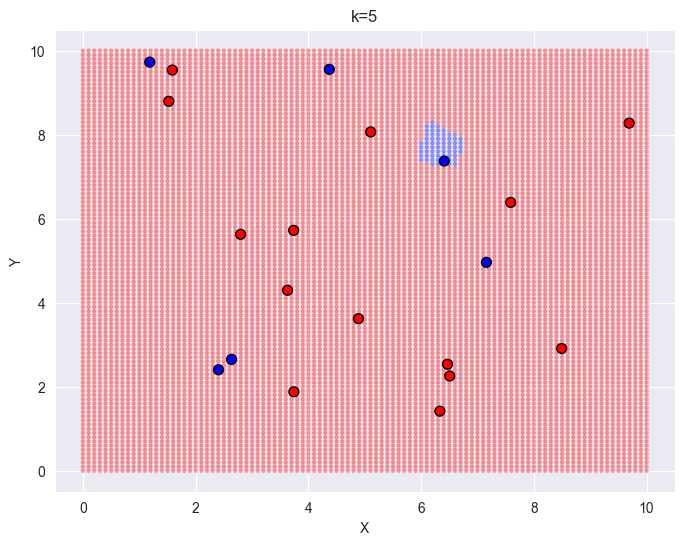

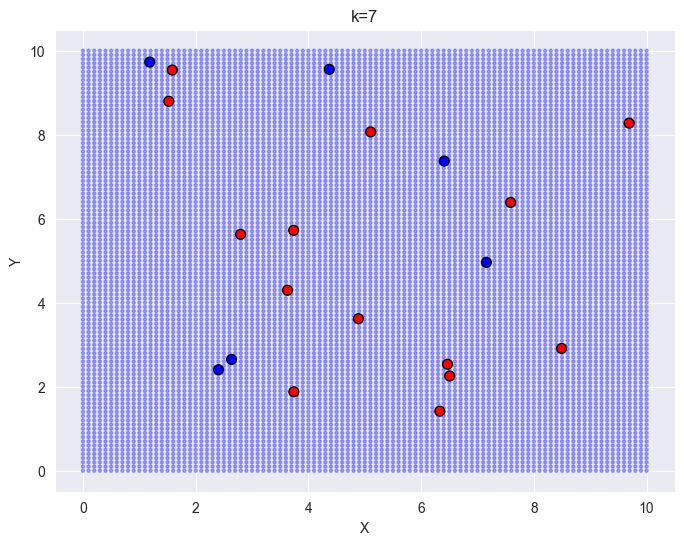

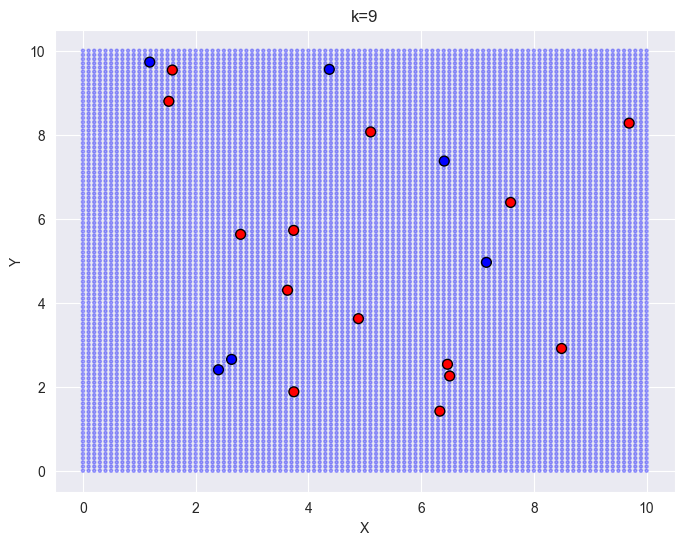

In [11]:
k_values=[1,5,7,9]

for k in k_values:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)

    plt.figure(figsize=(8,6))
    plt.scatter(X_test[:,0],X_test[:,1],c=y_pred,cmap='bwr',alpha=0.3,s=5)
    plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='bwr',edgecolor='black',s=50)
    plt.title(f"k={k}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()


## Q7)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)
X_train=np.random.uniform(1,10,size=(20,2))
y_train=np.random.choice([0,1],size=20)

model=KNeighborsClassifier()
param_grid={'n_neighbors':list(range(1,11))}
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)

print("Best k:",grid.best_params_['n_neighbors'])
print("Best cross-val accuracy:",grid.best_score_)


Best k: 5
Best cross-val accuracy: 0.7
